In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

In [77]:
df = pd.read_csv("data/Electric_Vehicle_Charging_Station_Energy_Consumption.csv")
df.head()

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,1
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,2
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,3
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,4
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2,5


In [78]:
df.shape

(32635, 16)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32635 entries, 0 to 32634
Data columns (total 16 columns):
Station_Name                  32635 non-null object
Address                       32635 non-null object
City                          32635 non-null object
State_Province                32635 non-null object
Zip_Postal_Code               32635 non-null int64
Start_Date___Time             32635 non-null object
Start_Time_Zone               32635 non-null object
End_Date___Time               32634 non-null object
End_Time_Zone                 32635 non-null object
Total_Duration__hh_mm_ss_     32635 non-null object
Charging_Time__hh_mm_ss_      32635 non-null object
Energy__kWh_                  32635 non-null float64
GHG_Savings__kg_              32635 non-null float64
Gasoline_Savings__gallons_    32635 non-null float64
Port_Type                     32635 non-null object
ObjectId                      32635 non-null int64
dtypes: float64(3), int64(2), object(11)
memory usage: 4.0

In [80]:
# Data cleaning - handling missing value
# check total number of null for each columns
df.isnull().sum()

Station_Name                  0
Address                       0
City                          0
State_Province                0
Zip_Postal_Code               0
Start_Date___Time             0
Start_Time_Zone               0
End_Date___Time               1
End_Time_Zone                 0
Total_Duration__hh_mm_ss_     0
Charging_Time__hh_mm_ss_      0
Energy__kWh_                  0
GHG_Savings__kg_              0
Gasoline_Savings__gallons_    0
Port_Type                     0
ObjectId                      0
dtype: int64

In [81]:
# remove rows where 'End_plugout_hour is Nan'
df = df[df.End_Date___Time.notnull()]
df.isnull().sum()

Station_Name                  0
Address                       0
City                          0
State_Province                0
Zip_Postal_Code               0
Start_Date___Time             0
Start_Time_Zone               0
End_Date___Time               0
End_Time_Zone                 0
Total_Duration__hh_mm_ss_     0
Charging_Time__hh_mm_ss_      0
Energy__kWh_                  0
GHG_Savings__kg_              0
Gasoline_Savings__gallons_    0
Port_Type                     0
ObjectId                      0
dtype: int64

In [82]:
# check duplicate records, no duplicate, so no dropping process
duplicate = df.duplicated()
df[duplicate]

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId


In [83]:
# change Total_Duration__hh_mm_ss_ from hours:min:secs: to hours
duration_column = []

for i in range(32634):
    duration = df.iloc[i]['Total_Duration__hh_mm_ss_']
    duration = duration.split(":")  # split the string with :
    duration = np.array(duration, dtype=np.float32)  # turn str to float
    total_duration = duration[0] + duration[1] / 60 + duration[2] / (60 * 60)
    total_duration = total_duration.round(decimals=2)  # round the float
    duration_column.append(total_duration)

df.insert(loc=10, column='Total_Duration__hh', value=duration_column)

df.head()

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Total_Duration__hh,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2.05,2:02:44,6.504,2.732,0.816,Level 2,1
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0.41,0:24:19,2.481,1.042,0.311,Level 2,2
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,9.21,3:40:52,15.046,6.319,1.888,Level 2,3
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1.91,1:54:29,6.947,2.918,0.872,Level 2,4
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0.28,0:16:44,1.800,0.756,0.226,Level 2,5


In [88]:
charge_time = []
for i in range(32634):
    date_time_str = df.iloc[i]['Start_Date___Time']
    date_time_obj = datetime.datetime.strptime(date_time_str, '%m/%d/%Y %H:%M')
    
    charge_time_str = df.iloc[i]['Charging_Time__hh_mm_ss_']
    charge_time_str = charge_time_str.split(":")  # split the string with :
    charge_time_float = np.array(charge_time_str, dtype=np.float)  # turn str to float
    
    charge_time_obj = date_time_obj + datetime.timedelta(hours=charge_time_float[0], minutes=charge_time_float[1])
    charge_time.append(charge_time_obj)

df.insert(loc=11, column='Charging_Date___Time', value=charge_time)
df.head()

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Total_Duration__hh,Charging_Date___Time,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2.05,2018-01-01 19:51:00,2:02:44,6.504,2.732,0.816,Level 2,1
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0.41,2018-01-02 09:16:00,0:24:19,2.481,1.042,0.311,Level 2,2
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,9.21,2018-01-03 00:51:00,3:40:52,15.046,6.319,1.888,Level 2,3
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1.91,2018-01-03 11:13:00,1:54:29,6.947,2.918,0.872,Level 2,4
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0.28,2018-01-03 14:29:00,0:16:44,1.800,0.756,0.226,Level 2,5


In [89]:
start_time_hour = []
start_year = []
start_month = []
start_day = []
end_time_hour = []
end_year = []
end_month = []
end_day = []

for i in range(32634):
    start = df.iloc[i]['Start_Date___Time']
    start = start.split()
    start_date = start[0].split("/")
    start_time = start[1].split(":")
    start_time_h = start_time[0]

    end = df.iloc[i]['End_Date___Time']
    end = end.split()
    end_date = end[0].split("/")
    end_time = end[1].split(":")
    end_time_h = end_time[0]
        
    start_time_hour.append(start_time_h)
    start_year.append(start_date[2])
    start_month.append(start_date[0])
    start_day.append(start_date[1])
    
    end_time_hour.append(end_time_h)
    end_year.append((end_date[2]))
    end_month.append(end_date[0])
    end_day.append(end_date[1])
    
df.insert(loc=6, column='Start_Time___hh', value=start_time_hour)
df.insert(loc=7, column='Start_Date___yy', value=start_year)
df.insert(loc=8, column='Start_Date___mm', value=start_month)
df.insert(loc=9, column='Start_Date___dd', value=start_day)
df.insert(loc=12, column='End_Time___hh', value=end_time_hour)
df.insert(loc=13, column='End_Date___yy', value=end_year)
df.insert(loc=14, column='End_Date___mm', value=end_month)
df.insert(loc=15, column='End_Date___dd', value=end_day)

df.head()

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time___hh,Start_Date___yy,Start_Date___mm,Start_Date___dd,...,End_Time_Zone,Total_Duration__hh_mm_ss_,Total_Duration__hh,Charging_Date___Time,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectId
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,17,2018,1,1,...,MDT,2:03:02,2.05,2018-01-01 19:51:00,2:02:44,6.504,2.732,0.816,Level 2,1
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,8,2018,1,2,...,MDT,0:24:34,0.41,2018-01-02 09:16:00,0:24:19,2.481,1.042,0.311,Level 2,2
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,21,2018,1,2,...,MDT,9:12:21,9.21,2018-01-03 00:51:00,3:40:52,15.046,6.319,1.888,Level 2,3
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,9,2018,1,3,...,MDT,1:54:51,1.91,2018-01-03 11:13:00,1:54:29,6.947,2.918,0.872,Level 2,4
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,14,2018,1,3,...,MDT,0:16:58,0.28,2018-01-03 14:29:00,0:16:44,1.800,0.756,0.226,Level 2,5


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32634 entries, 0 to 32634
Data columns (total 26 columns):
Station_Name                  32634 non-null object
Address                       32634 non-null object
City                          32634 non-null object
State_Province                32634 non-null object
Zip_Postal_Code               32634 non-null int64
Start_Date___Time             32634 non-null object
Start_Time___hh               32634 non-null object
Start_Date___yy               32634 non-null object
Start_Date___mm               32634 non-null object
Start_Date___dd               32634 non-null object
Start_Time_Zone               32634 non-null object
End_Date___Time               32634 non-null object
End_Time___hh                 32634 non-null object
End_Date___yy                 32634 non-null object
End_Date___mm                 32634 non-null object
End_Date___dd                 32634 non-null object
End_Time_Zone                 32634 non-null object
Total_Du

In [91]:
# Statistical Insight
df['Energy__kWh_'].describe()

count    32634.000000
mean         7.852877
std          7.614041
min          0.000000
25%          2.934000
50%          6.153000
75%         10.685750
max         85.200000
Name: Energy__kWh_, dtype: float64

In [11]:
df[['Station_Name','City','State_Province','Port_Type']].describe()

,Station_Name,City,State_Province,Port_Type
count,32635,32635,32635,32635
unique,28,1,1,1
top,BOULDER / N BOULDER REC 1,Boulder,Colorado,Level 2
freq,4213,32635,32635,32635


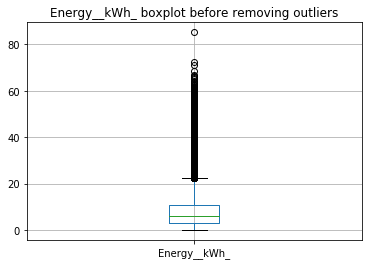

In [16]:
plt.title('Energy__kWh_ boxplot before removing outliers')
df.boxplot(column=['Energy__kWh_'])

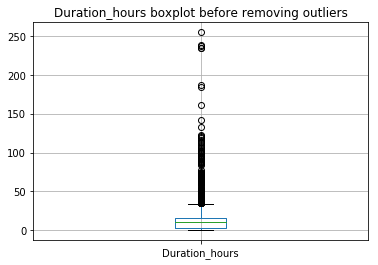

In [70]:
plt.title('Duration_hours boxplot before removing outliers')
df.boxplot(column=['Duration_hours'])

In [18]:
# handling outlier
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

count    32634.000000
mean         7.398034
std          5.916299
min          0.000000
25%          2.934000
50%          6.153000
75%         10.685750
max         22.313375
Name: Energy__kWh_, dtype: float64

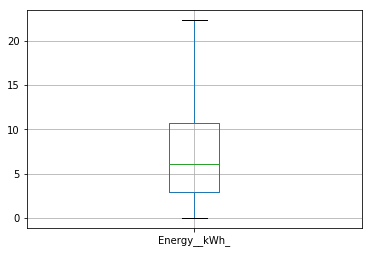

In [20]:
low_kWh, high_kWh = remove_outlier(df['Energy__kWh_'])
df['Energy__kWh_'] = np.where(df["Energy__kWh_"]>high_kWh, high_kWh, df["Energy__kWh_"])
df['Energy__kWh_'] = np.where(df["Energy__kWh_"]<low_kWh, low_kWh, df["Energy__kWh_"])
df.boxplot(column=['Energy__kWh_'])
df['Energy__kWh_'].describe()

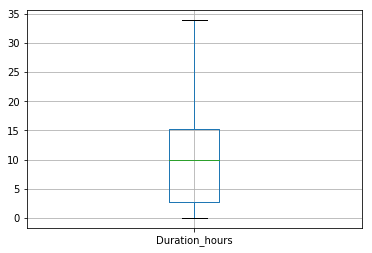

In [73]:
low_dh, high_dh = remove_outlier(df['Duration_hours'])
df['Duration_hours'] = np.where(df["Duration_hours"]>high_dh, high_dh, df["Duration_hours"])
df['Duration_hours'] = np.where(df["Duration_hours"]<low_dh, low_dh, df["Duration_hours"])
df.boxplot(column=['Duration_hours'])

In [74]:
# change User_ID to int
uniqueValues = df['User_ID'].unique()
user_count = 0

for user_id in uniqueValues:
    df.loc[df['User_ID'] == user_id, 'User_ID'] = user_count
    user_count += 1

In [75]:
# change Garage_ID to int
uniqueGValues = df['Garage_ID'].unique()
garage_count = 0

for garage_id in uniqueGValues:
    df.loc[df['Garage_ID'] == garage_id, 'Garage_ID'] = garage_count
    garage_count += 1

In [76]:
df.corr()

,session_ID,Garage_ID,User_ID,Start_plugin_hour,End_plugout_hour,El_kWh,Duration_hours
session_ID,1.000000,0.470250,0.568778,-0.017269,-0.035839,-0.038636,0.077421
Garage_ID,0.470250,1.000000,0.747710,0.009753,-0.094063,-0.181178,0.092339
User_ID,0.568778,0.747710,1.000000,0.006701,-0.028458,-0.157243,0.032599
Start_plugin_hour,-0.017269,0.009753,0.006701,1.000000,-0.146133,0.043971,0.113519
End_plugout_hour,-0.035839,-0.094063,-0.028458,-0.146133,1.000000,-0.193194,-0.391747
El_kWh,-0.038636,-0.181178,-0.157243,0.043971,-0.193194,1.000000,0.208215
Duration_hours,0.077421,0.092339,0.032599,0.113519,-0.391747,0.208215,1.000000


In [77]:
# Data normalization on Duration_hours and El_kWh
df[['Duration_hours', 'El_kWh']] = StandardScaler().fit_transform(df[['Duration_hours', 'El_kWh']])

In [78]:
# change month_plugin into int
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_dict = {v:k for k,v in enumerate(month_names, start=1)}
df['month_plugin'] = df['month_plugin'].map(month_dict)

# change weekdays_plugin into int
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_dict = {v:k for k,v in enumerate(weekday_names, start=1)}
df['weekdays_plugin'] = df['weekdays_plugin'].map(weekday_dict)

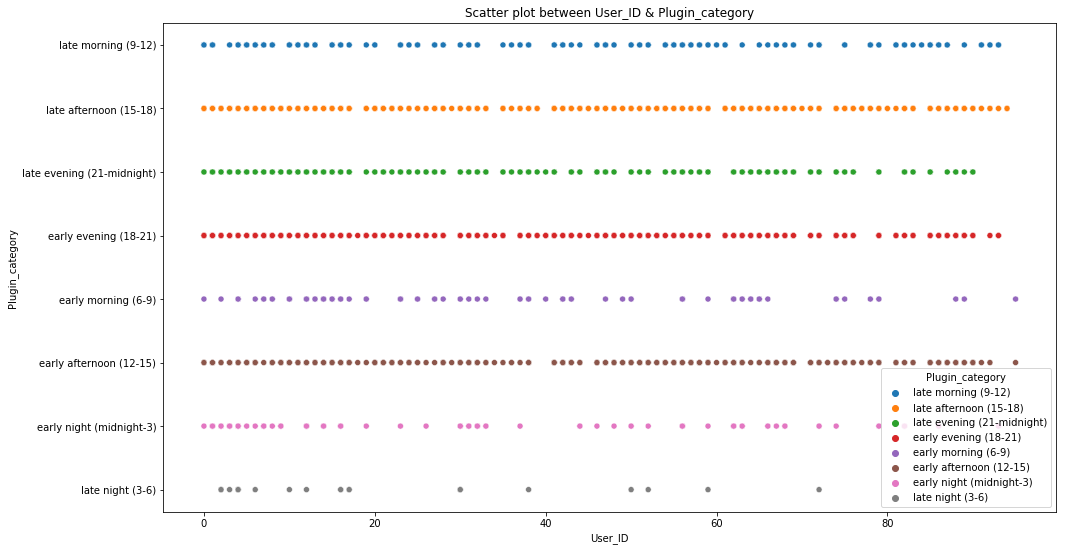

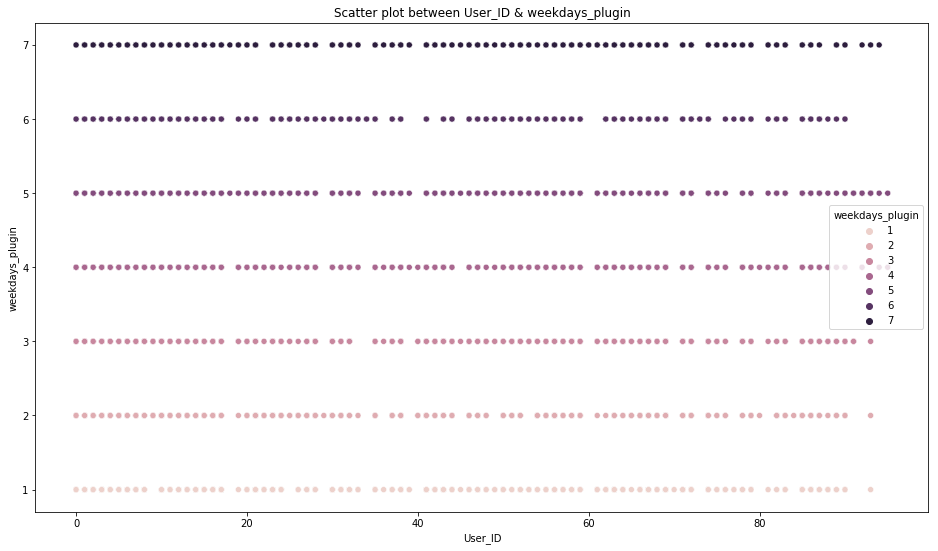

In [79]:
# plot scatter of relations between User_ID & Plugin_category per user
plt.figure(figsize=(16,9))
plt.title('Scatter plot between User_ID & Plugin_category')
sns.scatterplot(data=df, x="User_ID",y="Plugin_category", hue ="Plugin_category")
plt.show()

# plot scatter of relations between User_ID & El_kWh per user
plt.figure(figsize=(16,9))
plt.title('Scatter plot between User_ID & weekdays_plugin')
sns.scatterplot(data=df, x="User_ID",y="weekdays_plugin", hue ="weekdays_plugin")
plt.show()

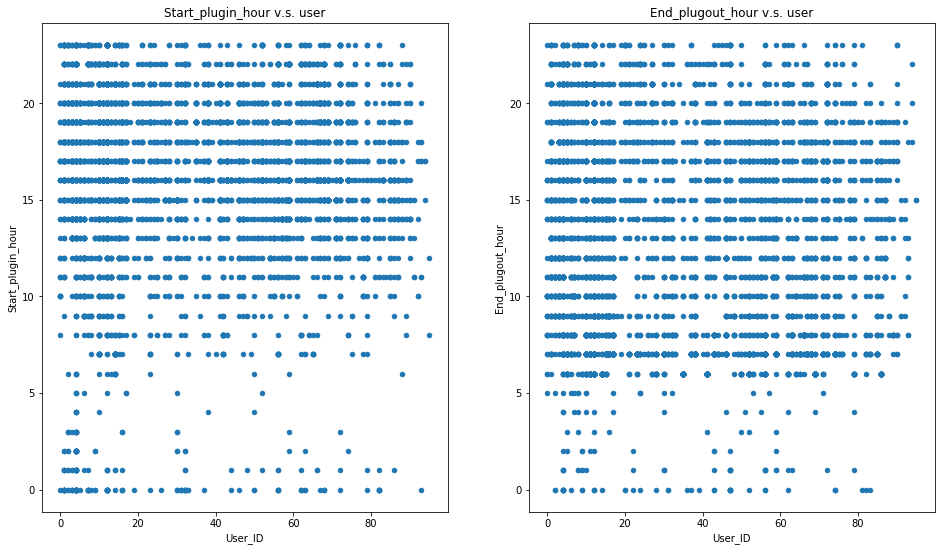

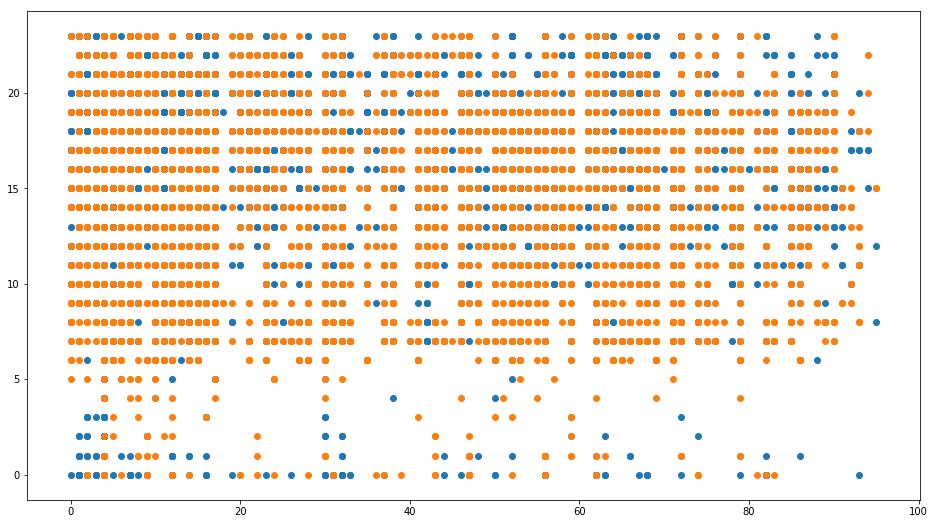

In [80]:
figure, axes = plt.subplots(1, 2)

# plot scatter of Start_plugin_hour per user
df.plot.scatter(x='User_ID', y='Start_plugin_hour', title= "Start_plugin_hour v.s. user",figsize=(16,9),ax=axes[0])
# plt.show(block=True)

# plot scatter of End_plugout_hour per user
df.plot.scatter(x='User_ID', y='End_plugout_hour', title= "End_plugout_hour v.s. user",figsize=(16,9),ax=axes[1])
plt.show(block=True)

# plot scatter of Start_plugin_hour & End_plugout_hour per user
plt.figure(figsize=(16,9))
plt.scatter(df['User_ID'], df['Start_plugin_hour'], label='Correlation between User ID and start_plugin_hour)')
plt.scatter(df['User_ID'], df['End_plugout_hour'], label='Correlation between User ID and End_plugout_hour)')

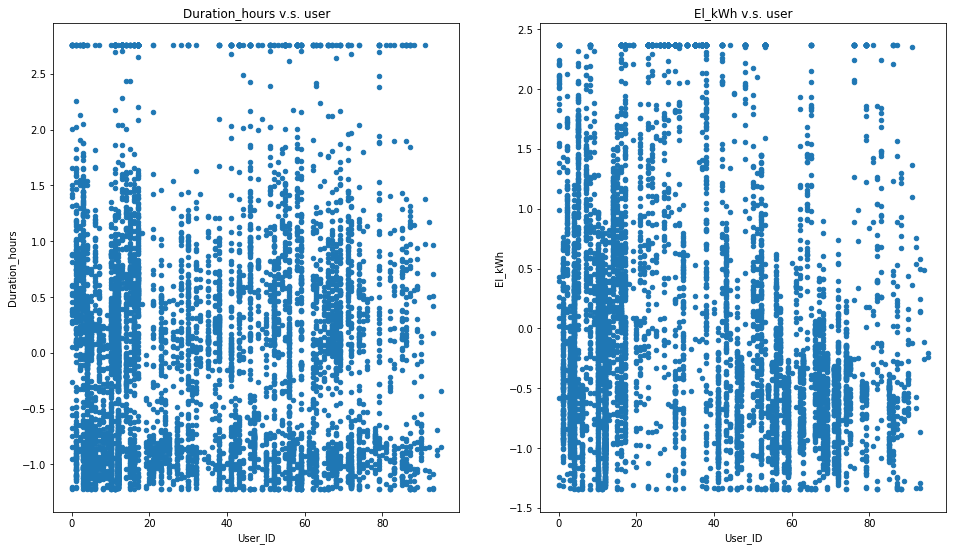

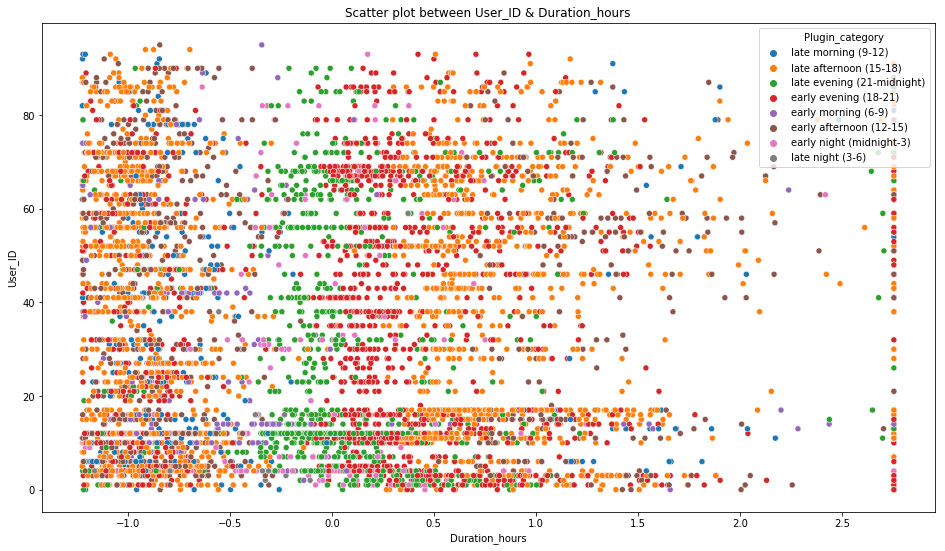

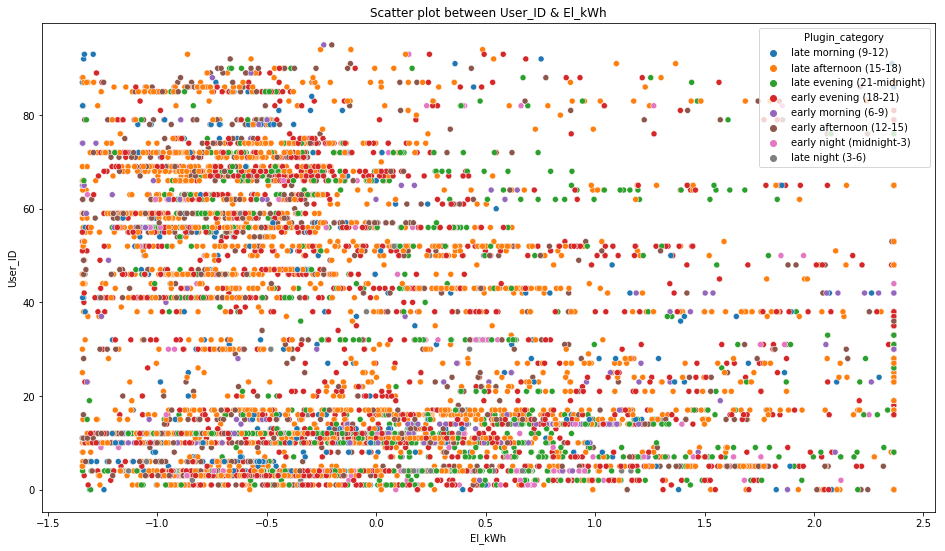

In [81]:
figure, axes = plt.subplots(1, 2)

# plot scatter of Duration_hours per user 
df.plot.scatter(x='User_ID', y='Duration_hours', title= "Duration_hours v.s. user",figsize=(16,9),ax=axes[0])
# plt.show(block=True)

# plot scatter of El_kWh per user
df.plot.scatter(x='User_ID', y='El_kWh', title= "El_kWh v.s. user",figsize=(16,9),ax=axes[1])
plt.show(block=True)

# using seaborn package to draw
# plot scatter of User_ID & Duration_hours in different timeslots
plt.figure(figsize=(16,9))
plt.title('Scatter plot between User_ID & Duration_hours')
sns.scatterplot(data=df,x="Duration_hours",y="User_ID", hue ="Plugin_category")
plt.show()

# plot scatter of User_ID & El_kWh in different timeslots
plt.figure(figsize=(16,9))
plt.title('Scatter plot between User_ID & El_kWh')
sns.scatterplot(data=df, x="El_kWh",y="User_ID", hue ="Plugin_category")
plt.show()


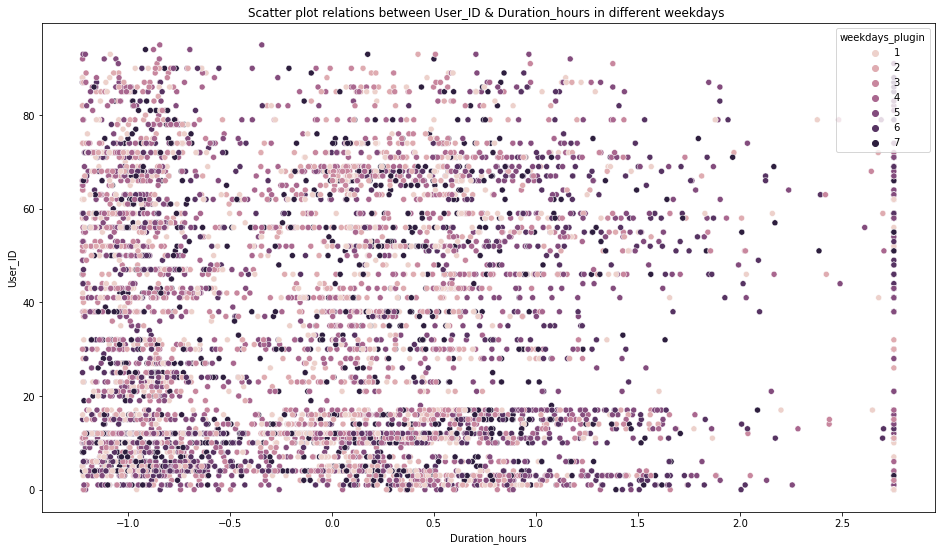

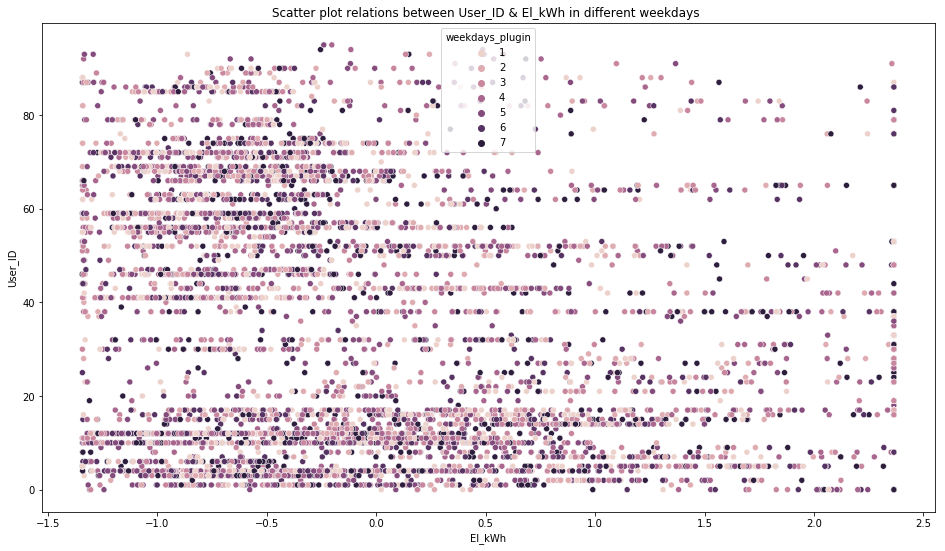

In [82]:
# plot scatter of relations between User_ID & Duration_hours in different weekdays
plt.figure(figsize=(16,9))
plt.title('Scatter plot relations between User_ID & Duration_hours in different weekdays ')
sns.scatterplot(data=df,x="Duration_hours",y="User_ID", hue ="weekdays_plugin")
plt.show()

# plot scatter of relations between User_ID & Duration_hours in different weekdays
plt.figure(figsize=(16,9))
plt.title('Scatter plot relations between User_ID & El_kWh in different weekdays ')
sns.scatterplot(data=df,x="El_kWh",y="User_ID", hue ="weekdays_plugin")
plt.show()

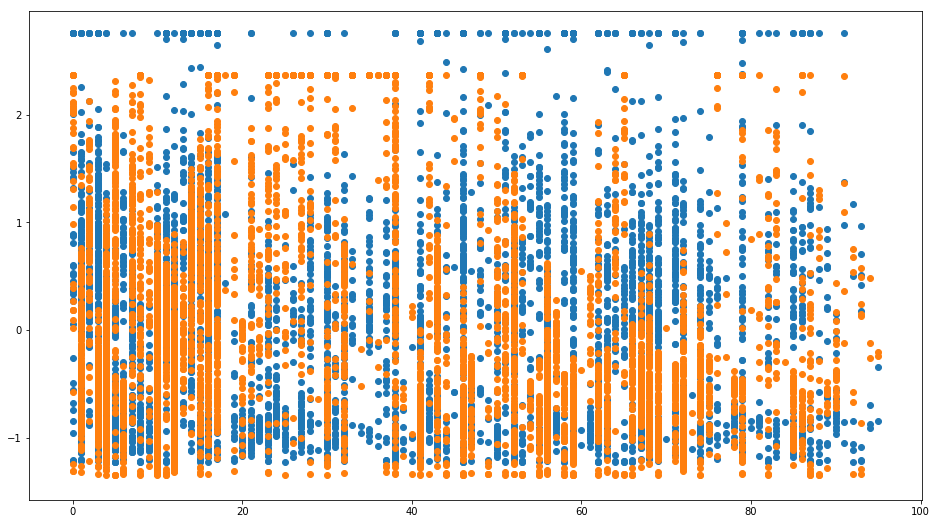

In [83]:
# overlap duration_hours and El_kWh per user
plt.figure(figsize=(16,9))
plt.scatter(df['User_ID'], df['Duration_hours'], label='Correlation between User ID and duration_hours)')
plt.scatter(df['User_ID'], df['El_kWh'], label='Correlation between User ID and El_kWh)')
plt.show()

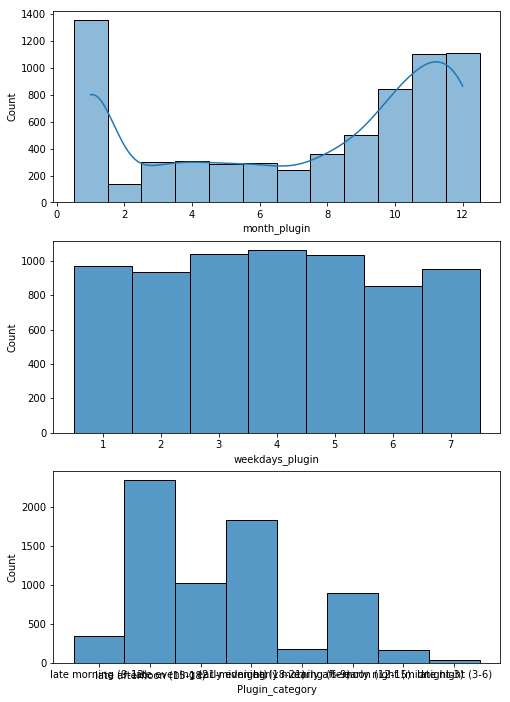

In [84]:
fig, axs = plt.subplots(3, 1, figsize=(8,12))
# plot histogram of month_plugin
sns.histplot(data=df, x= "month_plugin", kde=True, discrete=True,ax=axs[0])
# plot histogram of weekdays_plugin
sns.histplot(data=df, x= "weekdays_plugin", discrete=True,ax=axs[1])
# plot histogram of Plugin_category
sns.histplot(data=df, x= "Plugin_category", discrete=True,ax=axs[2])
plt.show()

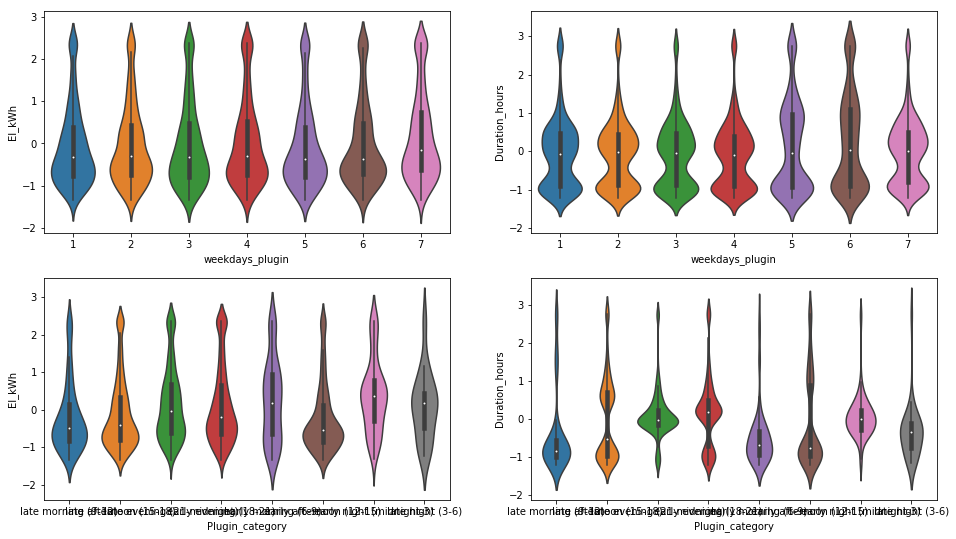

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))

# Violinplot plot of El_kWh per weekdays
ax = sns.violinplot(x="weekdays_plugin", y="El_kWh", data=df, ax=axes[0, 0])

# Violinplot plot of Duration_hours per weekdays
ax = sns.violinplot(x="weekdays_plugin", y="Duration_hours", data=df, ax=axes[0, 1])

# Violinplot plot of El_kWh per weekdays
ax = sns.violinplot(x="Plugin_category", y="El_kWh", data=df, ax=axes[1, 0])

# Violinplot plot of Duration_hours per weekdays
ax = sns.violinplot(x="Plugin_category", y="Duration_hours", data=df, ax=axes[1, 1])

plt.show()

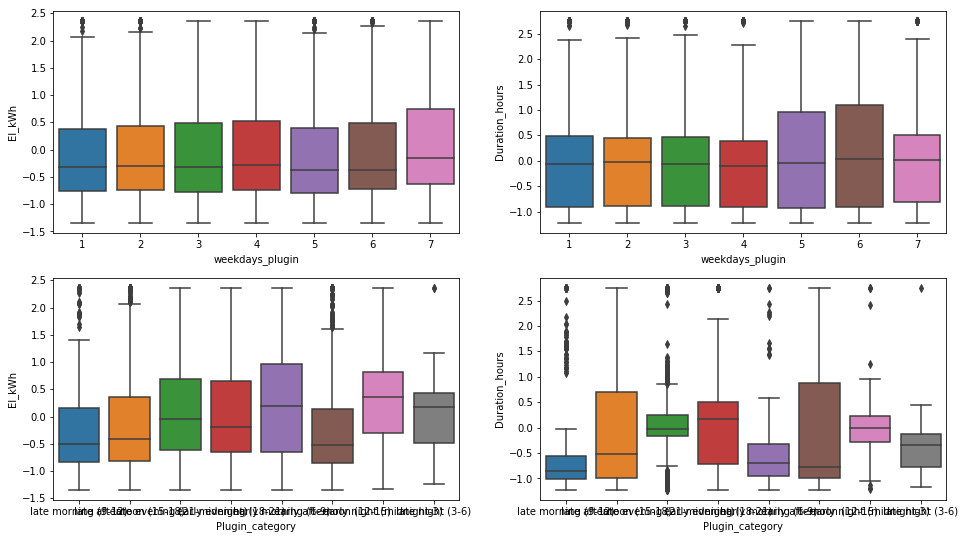

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))

# boxplot of El_kWh per weekdays
sns.boxplot(x="weekdays_plugin", y="El_kWh", data=df, orient='v', ax=axes[0, 0])

# boxplot of El_kWh per weekdays
sns.boxplot(x="weekdays_plugin", y="Duration_hours", data=df, orient='v', ax=axes[0, 1])

# boxplot of El_kWh per weekdays
sns.boxplot(x="Plugin_category", y="El_kWh", data=df, orient='v', ax=axes[1, 0])

# boxplot of El_kWh per weekdays
sns.boxplot(x="Plugin_category", y="Duration_hours", data=df, orient='v', ax=axes[1, 1])

plt.show()
